<a href="https://colab.research.google.com/github/felixgaschi/word-image-similarity/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SpottingNet: Word image similarity

In [2]:
import numpy as np
import os
import csv
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

## Features maps

In [3]:
labels = np.loadtxt("../embeddings/target.csv", dtype=np.int8)

In [4]:
liste = sorted([d for d in os.listdir("../embeddings") if os.path.isdir("../embeddings/" + d)], key=lambda x: int(x))

In [5]:
channels = [[d + "/" + file for file in os.listdir("../embeddings/" + d)] for d in liste]

In [6]:
NB_WORDS = np.max(labels) + 1

In [7]:
scores = []
details = []
pbar = tqdm_notebook(total=int(np.sum([len(c) for c in channels])))
for i in range(len(liste)):
    ch_scores = []
    ch_details = []
    for j in range(len(channels[i])):
        means = [None for _ in range(NB_WORDS)]
        count = [0 for _ in range(NB_WORDS)]
        with open("../embeddings/" +  channels[i][j], "r") as f:
            reader = csv.reader(f)
            for k, row in enumerate(reader):
                x = np.array([float(r) for r in row])
                if means[labels[k]] is None:
                    means[labels[k]] = x
                else:
                    means[labels[k]] += x
                count[labels[k]] += 1
        
        means = np.array([means[k] / count[k] for k in range(NB_WORDS)])
        
        inner_distance = [None for _ in range(NB_WORDS)]
        
        with open("../embeddings/" + channels[i][j], "r") as f:
            reader = csv.reader(f)
            for k, row in enumerate(reader):
                x = np.array([float(r) for r in row])
                if inner_distance[labels[k]] is None:
                    inner_distance[labels[k]] = np.inner(x - means[labels[k]], x - means[labels[k]])
                else:
                    inner_distance[labels[k]] += np.inner(x - means[labels[k]], x - means[labels[k]])
        
        inner_distance = np.array([inner_distance[k] / count[k] for k in range(NB_WORDS)])
        
        outer_distance = np.zeros((NB_WORDS, NB_WORDS))
        
        min_outer = np.inf
        for k in range(NB_WORDS):
            for l in range(NB_WORDS):
                dist = np.inner(means[k] - means[l], means[k] - means[l])
                if dist < min_outer and k != l:
                    min_outer = dist
                outer_distance[k,l] = dist
        
        ch_scores.append(min_outer / np.max(inner_distance))
        
        ch_details.append({
            "means": means,
            "inner": inner_distance,
            "outer": outer_distance
        })
        pbar.update(1)
        
    scores.append(ch_scores)
    details.append(ch_details)
                
pbar.close()           

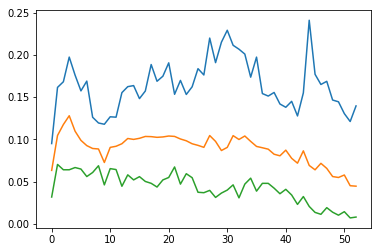

In [8]:
plt.plot([np.max(s) for s in scores])
plt.plot([np.mean(s) for s in scores])
plt.plot([np.min(s) for s in scores])
plt.show()

In [9]:
i_max = np.argmax([np.max(s) for s in scores])
j_max = np.argmax(scores[i_max])

In [10]:
details[i_max][j_max]

{'means': array([[ 0.04029039, -0.03676265, -0.06086512, -0.05390608, -0.05481697,
         -0.0117073 , -0.00923775, -0.02807629, -0.05302605, -0.03519315,
         -0.01038889, -0.033282  , -0.04487957, -0.06478451, -0.05590344,
         -0.05335381],
        [ 0.088095  , -0.01822767, -0.05456353, -0.09544735, -0.04459353,
          0.02048981, -0.00638178, -0.08793949, -0.03737051,  0.01975135,
          0.03847416, -0.08240661, -0.04669156, -0.01870838, -0.01348326,
         -0.07375345],
        [ 0.01252509, -0.03216474, -0.05495809, -0.05541478, -0.04410916,
          0.03837916,  0.01199008, -0.05731449, -0.03692277,  0.01959977,
          0.01816929, -0.05141298, -0.03340416, -0.01429645, -0.05656795,
         -0.08596411]]),
 'inner': array([0.05105406, 0.05262783, 0.04812616]),
 'outer': array([[0.        , 0.02153387, 0.01290851],
        [0.02153387, 0.        , 0.01267802],
        [0.01290851, 0.01267802, 0.        ]])}

In [11]:
i = 27
j = np.argmax(scores[i])
scores[i][j]

0.21978778740994098

In [12]:
details[i][j]

{'means': array([[-0.05707329, -0.02915685, -0.03502619, -0.01722032, -0.02934259,
          0.00777362, -0.04654155, -0.12935834, -0.18892331, -0.1330025 ,
         -0.13186908, -0.16064647, -0.1355929 , -0.10487025, -0.17364292,
         -0.09718999, -0.12344784, -0.13182106, -0.13423251, -0.16904535,
         -0.09955455, -0.1229465 , -0.08531048, -0.07836803, -0.06610433,
         -0.06497242, -0.0462165 , -0.08896755, -0.19194081, -0.23166452,
         -0.21285258, -0.25413228, -0.27367231, -0.22015812, -0.16885601,
         -0.1637133 ,  0.00864304, -0.0617801 , -0.04576126, -0.05644257,
         -0.03248154, -0.08255146, -0.12961691, -0.19717277, -0.14071038,
         -0.13581104, -0.16462857, -0.13838206, -0.10472946, -0.11821754,
         -0.11121429, -0.11569645, -0.12805174, -0.13906017, -0.15930974,
         -0.11559179],
        [-0.12918173, -0.00736536, -0.02412089, -0.02569787, -0.04884626,
         -0.05643117, -0.06444407, -0.13571332, -0.08917337, -0.14283547,
      

In [13]:
i_max, j_max

(44, 212)